In [1]:
pip install plotly

In [1]:
#Dependencias
import pandas as pd
import plotly as plt
import plotly.graph_objects as go


In [122]:
#Obteniendo la información recibida
jj = pd.read_csv("ScoreJJ2_.csv", encoding="Latin1")
rc = pd.read_csv("ScoreRC2.csv", encoding="Latin1")

In [123]:
jj["comentario_JJ"]

0      Me parece obvio que el impacto de la política ...
1      El sensor 5G como tal es relevante, sin embarg...
2      Aún no puedo decir que estaré a favor de esta ...
3      Este proyecto dependería en su caso de la urge...
4                                                    NaN
                             ...                        
261    Necesario más contexto para entender que se es...
262    Necesario más contexto para entender que se es...
263                                                  NaN
264    Es un programa muy relevante que requiere cont...
265    Pienso que el proyecto con ID 13 es genera e i...
Name: comentario_JJ, Length: 266, dtype: object

In [124]:
jj["comentario_JJ"] = jj["comentario_JJ"] + " [JJ]"

In [125]:
jj["comentario_JJ"] [6]

'Lo pensaría orientado a una simplificación? [JJ]'

In [126]:
rc['comentario_RC'] = rc["comentario_RC"] + " [RC]"

In [127]:
rc['comentario_RC'] [268]

'Se considera Alto Impacto por ser de PAT 2021 [RC]'

In [128]:
rc.iloc[1]

id_final                                                                2
objetivos                                   Objetivo 3 (Adopción Digital)
estrategias                                                Estrategia 3.2
LARs                    LAR 3.2.1: Realizar un monitoreo y análisis te...
LAR                                                             LAR 3.2.2
acciones_potenciales    Analizar la evolución tecnológica de radiodifu...
categoria                                                      Micrositio
temas                                                       Industria 4.0
agenda                                                                NaN
nombre                                                          Sensor 5G
valor_RC                                                                A
esfuerzo_RC                                                             B
comentario_RC           Se considera Alto Impacto por ser de PAT 2021 ...
score_RC                              

In [161]:
merge = pd.merge(jj, rc, on='id_final')

In [162]:
merge.columns

Index(['id_final', 'objetivos_x', 'estrategias_x', 'LARs_x', 'LAR_x',
       'acciones_potenciales_x', 'categoria_x', 'temas_x', 'agenda_x',
       'nombre_x', 'valor_JJ', 'esfuerzo_JJ', 'comentario_JJ', 'score_JJ',
       'tipo_g_x', 'tipo_x', 'proyecto_actividad_x', 'tiempo_x',
       'responsable_x', 'objetivos_y', 'estrategias_y', 'LARs_y', 'LAR_y',
       'acciones_potenciales_y', 'categoria_y', 'temas_y', 'agenda_y',
       'nombre_y', 'valor_RC', 'esfuerzo_RC', 'comentario_RC', 'score_RC',
       'tipo_g_y', 'tipo_y', 'proyecto_actividad_y', 'prioridad', 'tiempo_y',
       'responsable_y', 'comentarios_áreas', 'regulador_G5',
       'tipo_coadyuvancia'],
      dtype='object')

In [163]:
merge['comentarios'] = '-' + merge['comentario_JJ'] + ' \n\n ' + '-'+ merge['comentario_RC']
merge['comentarios'][1]

'-El sensor 5G como tal es relevante, sin embargo, la acción potencial que se describe, relacionada más bien a ATSC 3.0 no considero que en este momento sea una prioridad.  \n\nCasos de uso 5G definitivamente si debería ser prioritario. [JJ] \n\n -Se considera Alto Impacto por ser de PAT 2021 [RC]'

In [164]:
merge.iloc[1]

id_final                                                                  2
objetivos_x                                   Objetivo 3 (Adopción Digital)
estrategias_x                                                Estrategia 3.2
LARs_x                    LAR 3.2.1: Realizar un monitoreo y análisis te...
LAR_x                                                             LAR 3.2.2
acciones_potenciales_x    Analizar la evolución tecnológica de radiodifu...
categoria_x                                                      Micrositio
temas_x                                                       Industria 4.0
agenda_x                                                                NaN
nombre_x                                                          Sensor 5G
valor_JJ                                                                  M
esfuerzo_JJ                                                               M
comentario_JJ             El sensor 5G como tal es relevante, sin embarg...
score_JJ    

In [165]:
merge.columns

Index(['id_final', 'objetivos_x', 'estrategias_x', 'LARs_x', 'LAR_x',
       'acciones_potenciales_x', 'categoria_x', 'temas_x', 'agenda_x',
       'nombre_x', 'valor_JJ', 'esfuerzo_JJ', 'comentario_JJ', 'score_JJ',
       'tipo_g_x', 'tipo_x', 'proyecto_actividad_x', 'tiempo_x',
       'responsable_x', 'objetivos_y', 'estrategias_y', 'LARs_y', 'LAR_y',
       'acciones_potenciales_y', 'categoria_y', 'temas_y', 'agenda_y',
       'nombre_y', 'valor_RC', 'esfuerzo_RC', 'comentario_RC', 'score_RC',
       'tipo_g_y', 'tipo_y', 'proyecto_actividad_y', 'prioridad', 'tiempo_y',
       'responsable_y', 'comentarios_áreas', 'regulador_G5',
       'tipo_coadyuvancia', 'comentarios'],
      dtype='object')

In [166]:
merge['is_equal_proy'] = merge['proyecto_actividad_x'].str.lower() == merge['proyecto_actividad_y'].str.lower()
merge['is_equal_proy'].value_counts()

True    266
Name: is_equal_proy, dtype: int64

In [167]:
merge['is_equal_score'] = merge['score_JJ'] == merge['score_RC']
merge['is_equal_score'].value_counts()

False    208
True      58
Name: is_equal_score, dtype: int64

In [168]:
merge = merge.drop(['tiempo_x', 'objetivos_y', 'estrategias_y', 'LARs_y', 'LAR_y',
       'acciones_potenciales_y', 'categoria_y', 'temas_y', 'agenda_y',
       'nombre_y','proyecto_actividad_y', 'responsable_y', "tipo_g_y", "tipo_y"], axis=1)

In [169]:
merge.iloc[3]

id_final                                                                  4
objetivos_x                   Objetivo 4 (Protección, Calidad y Pluralidad)
estrategias_x                                                Estrategia 4.4
LARs_x                    LAR 4.4.1: Colaborar con las instituciones cor...
LAR_x                                                             LAR 4.4.1
acciones_potenciales_x    Colaborar con las instituciones correspondient...
categoria_x                                                    Colaboración
temas_x                             Protección de las audiencias y usuarios
agenda_x                                                                NaN
nombre_x                  Actualización a la Carta de Derechos de los Us...
valor_JJ                                                                  M
esfuerzo_JJ                                                               M
comentario_JJ             Este proyecto dependería en su caso de la urge...
score_JJ    

In [170]:
merge_proyectos = merge.loc[merge['proyecto_actividad_x']=="Proyecto"]

In [171]:
merge_proyectos

,id_final,objetivos_x,estrategias_x,LARs_x,LAR_x,acciones_potenciales_x,categoria_x,temas_x,agenda_x,nombre_x,...,comentario_RC,score_RC,prioridad,tiempo_y,comentarios_áreas,regulador_G5,tipo_coadyuvancia,comentarios,is_equal_proy,is_equal_score
1,2,Objetivo 3 (Adopción Digital),Estrategia 3.2,LAR 3.2.1: Realizar un monitoreo y análisis te...,LAR 3.2.2,Analizar la evolución tecnológica de radiodifu...,Micrositio,Industria 4.0,NaN,Sensor 5G,...,Se considera Alto Impacto por ser de PAT 2021 ...,70,2021,2021,NaN,Sí,Coadyuvancia,"-El sensor 5G como tal es relevante, sin embar...",True,False
2,3,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para la determinación de multas en materi...,...,Se considera Alto Impacto por ser de PAT 2021 ...,70,2021,2021,La UCE participará en cualquier iniciativa tra...,NaN,Coadyuvancia,-Aún no puedo decir que estaré a favor de esta...,True,False
3,4,"Objetivo 4 (Protección, Calidad y Pluralidad)",Estrategia 4.4,LAR 4.4.1: Colaborar con las instituciones cor...,LAR 4.4.1,Colaborar con las instituciones correspondient...,Colaboración,Protección de las audiencias y usuarios,NaN,Actualización a la Carta de Derechos de los Us...,...,Se considera Alto Impacto por ser de PAT 2021 ...,70,2021,2021,Para el año 2021 se tiene programada una actua...,NaN,Individual,-Este proyecto dependería en su caso de la urg...,True,False
4,5,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para el desarrollo de Estudios de Mercado...,...,NaN,70,2021,2021,El documento de abogacía revisará las acciones...,NaN,Individual,NaN,True,False
5,6,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.2: Aplicar la política de competencia ...,LAR 2.1.2,Diseñar una propuesta preliminar de la metodol...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para determinar Mercados Relevantes en lo...,...,NaN,70,2021,2021,Se trabaja actualmente una guía con elementos ...,NaN,Individual,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,456,Objetivo Transversal,Estrategia T.1,LAR T.1.2: Fomentar la sistematización y digit...,LAR T.1.2,Valorar potenciales adecuaciones en la\nestruc...,Diseño Institucional,Innovación Institucional,NaN,Estrategia de Gobierno Electrónico y Abierto,...,Se considera Alto Impacto por ser de fecha de ...,100,2026,Continuo,La actual Estrategia de Gobierno Electrónico d...,NaN,Coadyuvancia,-¿cómo se relaciona con el proyecto de ID 28? ...,True,True
258,498,Objetivo Transversal,Estrategia T.1,LAR T.1.4: Establecer acciones específicas par...,LAR 2.1.4,Garantizar un seguimiento oportuno y continuo ...,Supervisión y verificación,Innovación Institucional,NaN,Reportes periódicos que emitirá periódicamente...,...,Se considera Alto Impacto por ser de fecha de ...,100,2026,Continuo,"Se adiciona la presente línea de acción, por e...",NaN,Individual,- Los reportes periódicos que se emiten periód...,True,False
259,499,Objetivo Transversal,Estrategia T.1,LAR T.1.1: Fortalecer el diseño institucional ...,LAR T.1.1,Realizar un análisis integral de referencias i...,Diseño Institucional,Innovación Institucional,NaN,Criterios técnico-jurídicos para la debida mot...,...,Se considera Alto Impacto por ser de PAT 2021 ...,100,2021,2021,NaN,NaN,Individual,-Pensé que este debate ya estaba superado. Ya ...,True,False
263,503,Objetivo 1 (Infraestructura),Estrategia 1.1,LAR 1.1.1: Colaborar con los distintos órdenes...,LAR 1.1.1,"Identificar, en colaboración con los concesion...",Regulación,Infraestructura Digital,NaN,Modificación a los Planes Técnicos Fundamental...,...,NaN,85,2022,2022,NaN,NaN,Individual,NaN,True,False


In [172]:

projects = merge_proyectos['nombre_x']

fig = go.Figure()
fig.add_trace(go.Bar(x=projects,
                y=merge_proyectos['score_JJ'],
                name='Javier Juárez',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=projects,
                y=merge_proyectos['score_RC'],
                name='Ramiro Camacho',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Comparativo de score por Comisionado',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Score',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [173]:
merge.columns

Index(['id_final', 'objetivos_x', 'estrategias_x', 'LARs_x', 'LAR_x',
       'acciones_potenciales_x', 'categoria_x', 'temas_x', 'agenda_x',
       'nombre_x', 'valor_JJ', 'esfuerzo_JJ', 'comentario_JJ', 'score_JJ',
       'tipo_g_x', 'tipo_x', 'proyecto_actividad_x', 'responsable_x',
       'valor_RC', 'esfuerzo_RC', 'comentario_RC', 'score_RC', 'prioridad',
       'tiempo_y', 'comentarios_áreas', 'regulador_G5', 'tipo_coadyuvancia',
       'comentarios', 'is_equal_proy', 'is_equal_score'],
      dtype='object')

In [177]:
merge.rename(columns={'id_final':'id_final', 'objetivos_x':'objetivos', 'estrategias_x':'estrategias', 'LARs_x':'LARs', 'LAR_x':"LAR",
       'acciones_potenciales_x':'acciones_potenciales', 'categoria_x':'categoria', 'temas_x':'temas', 'agenda_x':'agenda',
       'nombre_x':'nombre', 'valor_JJ':'valor_JJ', 'esfuerzo_JJ':'esfuerzo_JJ', 'comentario_JJ':'comentario_JJ', 'score_JJ':'score_JJ',
       'tipo_g_x':'tipo_g', 'tipo_x':'tipo', 'proyecto_actividad_x':'proyecto_actividad', 'responsable_x':'responsable',
       'valor_RC':'valor_RC', 'esfuerzo_RC':'esfuerzo_RC', 'comentario_RC':'comentario_RC', 'score_RC':'score_RC', 'prioridad':'prioridad','tiempo_y':'tiempo','comentarios_áreas':'comentarios_áreas','regulador_G5':'regulador_G5',
       'tipo_coadyuvancia':'tipo_coadyuvancia','comentarios':'comentarios','is_equal_proy':'is_equal_proy','is_equal_score':'is_equal_score'}, inplace=True)

In [189]:
merge['average_score'] = (merge['score_JJ'] + merge['score_RC'])/2

In [195]:
merge.to_csv("consolidado.csv", encoding='Latin1')

# Comisionado Robles

In [278]:
master = pd.read_csv("consolidado.csv", encoding='Latin1')
ar = pd.read_csv("oficina ARR.csv", encoding='Latin1')
ar.drop(ar.columns[14], axis=1, inplace=True)
ar

,id_final,objetivos,estrategias,LARs,LAR,acciones_potenciales,categoria,temas,agenda,nombre,valor_AR,esfuerzo_AR,comentario_AR,score_AR
0,1,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,Análisis de impacto ex post de la política de ...,M,A,NaN,65
1,2,Objetivo 3 (Adopción Digital),Estrategia 3.2,LAR 3.2.1: Realizar un monitoreo y análisis te...,LAR 3.2.2,Analizar la evolución tecnológica de radiodifu...,Micrositio,Industria 4.0,NaN,Sensor 5G (Parece MUY contradictoria la acción...,M,M,NaN,50
2,3,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para la determinación de multas en materi...,M,M,NaN,50
3,4,"Objetivo 4 (Protección, Calidad y Pluralidad)",Estrategia 4.4,LAR 4.4.1: Colaborar con las instituciones cor...,LAR 4.4.1,Colaborar con las instituciones correspondient...,Colaboración,Protección de las audiencias y usuarios,NaN,Actualización a la Carta de Derechos de los Us...,M,A,NaN,65
4,5,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para el desarrollo de Estudios de Mercado...,A,A,NaN,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,501,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,Análisis de los patrones de uso y disponibilid...,B,M,NaN,15
270,502,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,Evaluación de los beneficios generados a los u...,B,A,NaN,30
271,503,Objetivo 1 (Infraestructura),Estrategia 1.1,LAR 1.1.1: Colaborar con los distintos órdenes...,LAR 1.1.1,"Identificar, en colaboración con los concesion...",Regulación,Infraestructura Digital,NaN,Modificación a los Planes Técnicos Fundamental...,A,A,NaN,100
272,504,"Objetivo 4 (Protección, Calidad y Pluralidad)",Estrategia 4.3,LAR 4.3.1 Fomentar un entorno de colaboración ...,LAR 4.3.1,A partir de los trabajos realizados por elInst...,Plan o Agenda,Alfabetización Digital,NaN,"Programa Pro-Radio, Programa de Promoción y Fo...",M,A,NaN,65


In [279]:
ar["comentario_AR"] = ar["comentario_AR"] + " [ARR]"

In [280]:
ar['comentario_AR'][37]

'(Se decide en 2021, pierde sentido) [ARR]'

In [281]:
master.drop(master.columns[0], axis=1, inplace=True)

In [282]:
merge.columns

Index(['Unnamed: 0', 'id_final', 'objetivos_x', 'estrategias_x', 'LARs_x',
       'LAR_x', 'acciones_potenciales_x', 'categoria_x', 'temas_x', 'agenda_x',
       'nombre_x', 'valor_JJ', 'esfuerzo_JJ', 'comentario_JJ', 'score_JJ',
       'tipo_g', 'tipo', 'proyecto_actividad', 'responsable', 'valor_RC',
       'esfuerzo_RC', 'comentario_RC', 'score_RC', 'prioridad', 'tiempo',
       'comentarios_áreas', 'regulador_G5', 'tipo_coadyuvancia', 'comentarios',
       'is_equal_proy', 'is_equal_score', 'average_score', 'valor_AR',
       'esfuerzo_AR', 'comentario_AR', 'score_AR', 'coment_total'],
      dtype='object')

In [283]:
merge.drop(['Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'comentarios2'], axis=1, inplace=True)
merge.columns

KeyError: "['Unnamed: 14' 'Unnamed: 15' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'\n 'Unnamed: 19' 'Unnamed: 20' 'Unnamed: 21' 'comentarios2'] not found in axis"

In [284]:
merge['comentarios'][36]

''

In [285]:
merge['comentarios']=merge['comentarios'].fillna('')
merge['comentario_AR']=merge['comentario_AR'].fillna('')

In [286]:
merge['coment_total'] = merge['comentario_AR'] + merge['comentarios']
merge['coment_total'][264]

'-Es un programa muy relevante que requiere continuidad. [JJ] \n\n -Se considera Alto Impacto por tener fecha de ejecución Continuo [RC]'

In [287]:
merge

,Unnamed: 0,id_final,objetivos_x,estrategias_x,LARs_x,LAR_x,acciones_potenciales_x,categoria_x,temas_x,agenda_x,...,tipo_coadyuvancia,comentarios,is_equal_proy,is_equal_score,average_score,valor_AR,esfuerzo_AR,comentario_AR,score_AR,coment_total
0,0,1,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,...,Individual,-Me parece obvio que el impacto de la política...,True,False,42.5,M,A,,65,-Me parece obvio que el impacto de la política...
1,1,2,Objetivo 3 (Adopción Digital),Estrategia 3.2,LAR 3.2.1: Realizar un monitoreo y análisis te...,LAR 3.2.2,Analizar la evolución tecnológica de radiodifu...,Micrositio,Industria 4.0,NaN,...,Coadyuvancia,"-El sensor 5G como tal es relevante, sin embar...",True,False,60.0,M,M,,50,"-El sensor 5G como tal es relevante, sin embar..."
2,2,3,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,...,Coadyuvancia,-Aún no puedo decir que estaré a favor de esta...,True,False,35.0,M,M,,50,-Aún no puedo decir que estaré a favor de esta...
3,3,4,"Objetivo 4 (Protección, Calidad y Pluralidad)",Estrategia 4.4,LAR 4.4.1: Colaborar con las instituciones cor...,LAR 4.4.1,Colaborar con las instituciones correspondient...,Colaboración,Protección de las audiencias y usuarios,NaN,...,Individual,-Este proyecto dependería en su caso de la urg...,True,False,60.0,M,A,,65,-Este proyecto dependería en su caso de la urg...
4,4,5,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,...,Individual,,True,False,35.0,A,A,,100,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,501,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,...,Individual,-Necesario más contexto para entender que se e...,True,False,60.0,B,M,,15,-Necesario más contexto para entender que se e...
262,262,502,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,...,Individual,-Necesario más contexto para entender que se e...,True,False,67.5,B,A,,30,-Necesario más contexto para entender que se e...
263,263,503,Objetivo 1 (Infraestructura),Estrategia 1.1,LAR 1.1.1: Colaborar con los distintos órdenes...,LAR 1.1.1,"Identificar, en colaboración con los concesion...",Regulación,Infraestructura Digital,NaN,...,Individual,,True,False,67.5,A,A,,100,
264,264,504,"Objetivo 4 (Protección, Calidad y Pluralidad)",Estrategia 4.3,LAR 4.3.1 Fomentar un entorno de colaboración ...,LAR 4.3.1,A partir de los trabajos realizados por elInst...,Plan o Agenda,Alfabetización Digital,NaN,...,Individual,-Es un programa muy relevante que requiere con...,True,False,100.0,M,A,,65,-Es un programa muy relevante que requiere con...


In [288]:
merge['is_equal_score'] = merge['average_score'] == merge['score_AR']
merge['is_equal_score'].value_counts()

False    225
True      41
Name: is_equal_score, dtype: int64

In [289]:
merge.columns

Index(['Unnamed: 0', 'id_final', 'objetivos_x', 'estrategias_x', 'LARs_x',
       'LAR_x', 'acciones_potenciales_x', 'categoria_x', 'temas_x', 'agenda_x',
       'nombre_x', 'valor_JJ', 'esfuerzo_JJ', 'comentario_JJ', 'score_JJ',
       'tipo_g', 'tipo', 'proyecto_actividad', 'responsable', 'valor_RC',
       'esfuerzo_RC', 'comentario_RC', 'score_RC', 'prioridad', 'tiempo',
       'comentarios_áreas', 'regulador_G5', 'tipo_coadyuvancia', 'comentarios',
       'is_equal_proy', 'is_equal_score', 'average_score', 'valor_AR',
       'esfuerzo_AR', 'comentario_AR', 'score_AR', 'coment_total'],
      dtype='object')

In [292]:
merge = merge.drop(['Unnamed: 0'], axis=1)

In [293]:
merge.columns

Index(['id_final', 'objetivos_x', 'estrategias_x', 'LARs_x', 'LAR_x',
       'acciones_potenciales_x', 'categoria_x', 'temas_x', 'agenda_x',
       'nombre_x', 'valor_JJ', 'esfuerzo_JJ', 'comentario_JJ', 'score_JJ',
       'tipo_g', 'tipo', 'proyecto_actividad', 'responsable', 'valor_RC',
       'esfuerzo_RC', 'comentario_RC', 'score_RC', 'prioridad', 'tiempo',
       'comentarios_áreas', 'regulador_G5', 'tipo_coadyuvancia', 'comentarios',
       'is_equal_proy', 'is_equal_score', 'average_score', 'valor_AR',
       'esfuerzo_AR', 'comentario_AR', 'score_AR', 'coment_total'],
      dtype='object')

In [294]:
merge.rename(columns={'id_final':'id_final', 'objetivos_x':'objetivos', 'estrategias_x':'estrategias', 'LARs_x':'LARs', 'LAR_x':"LAR",
       'acciones_potenciales_x':'acciones_potenciales', 'categoria_x':'categoria', 'temas_x':'temas', 'agenda_x':'agenda',
       'nombre_x':'nombre', 'valor_JJ':'valor_JJ', 'esfuerzo_JJ':'esfuerzo_JJ', 'comentario_JJ':'comentario_JJ', 'score_JJ':'score_JJ',
       }, inplace=True)

In [297]:
merge

,id_final,objetivos,estrategias,LARs,LAR,acciones_potenciales,categoria,temas,agenda,nombre,...,tipo_coadyuvancia,comentarios,is_equal_proy,is_equal_score,average_score,valor_AR,esfuerzo_AR,comentario_AR,score_AR,coment_total
0,1,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,Análisis de impacto ex post de la política de ...,...,Individual,-Me parece obvio que el impacto de la política...,True,False,42.5,M,A,,65,-Me parece obvio que el impacto de la política...
1,2,Objetivo 3 (Adopción Digital),Estrategia 3.2,LAR 3.2.1: Realizar un monitoreo y análisis te...,LAR 3.2.2,Analizar la evolución tecnológica de radiodifu...,Micrositio,Industria 4.0,NaN,Sensor 5G,...,Coadyuvancia,"-El sensor 5G como tal es relevante, sin embar...",True,False,60.0,M,M,,50,"-El sensor 5G como tal es relevante, sin embar..."
2,3,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para la determinación de multas en materi...,...,Coadyuvancia,-Aún no puedo decir que estaré a favor de esta...,True,False,35.0,M,M,,50,-Aún no puedo decir que estaré a favor de esta...
3,4,"Objetivo 4 (Protección, Calidad y Pluralidad)",Estrategia 4.4,LAR 4.4.1: Colaborar con las instituciones cor...,LAR 4.4.1,Colaborar con las instituciones correspondient...,Colaboración,Protección de las audiencias y usuarios,NaN,Actualización a la Carta de Derechos de los Us...,...,Individual,-Este proyecto dependería en su caso de la urg...,True,False,60.0,M,A,,65,-Este proyecto dependería en su caso de la urg...
4,5,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para el desarrollo de Estudios de Mercado...,...,Individual,,True,False,35.0,A,A,,100,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,501,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,Análisis de los patrones de uso y disponibilid...,...,Individual,-Necesario más contexto para entender que se e...,True,False,60.0,B,M,,15,-Necesario más contexto para entender que se e...
262,502,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,Evaluación de los beneficios generados a los u...,...,Individual,-Necesario más contexto para entender que se e...,True,False,67.5,B,A,,30,-Necesario más contexto para entender que se e...
263,503,Objetivo 1 (Infraestructura),Estrategia 1.1,LAR 1.1.1: Colaborar con los distintos órdenes...,LAR 1.1.1,"Identificar, en colaboración con los concesion...",Regulación,Infraestructura Digital,NaN,Modificación a los Planes Técnicos Fundamental...,...,Individual,,True,False,67.5,A,A,,100,
264,504,"Objetivo 4 (Protección, Calidad y Pluralidad)",Estrategia 4.3,LAR 4.3.1 Fomentar un entorno de colaboración ...,LAR 4.3.1,A partir de los trabajos realizados por elInst...,Plan o Agenda,Alfabetización Digital,NaN,"Programa Pro-Radio, Programa de Promoción y Fo...",...,Individual,-Es un programa muy relevante que requiere con...,True,False,100.0,M,A,,65,-Es un programa muy relevante que requiere con...


In [307]:
merge['average_score'] = round((merge['score_JJ'] + merge['score_RC']+ merge['score_AR'])/3)

In [308]:
merge['average_score']

0       50.0
1       57.0
2       40.0
3       62.0
4       57.0
       ...  
261     45.0
262     55.0
263     78.0
264     88.0
265    100.0
Name: average_score, Length: 266, dtype: float64

In [309]:
merge.to_csv("consolidado1.csv", encoding='Latin1')

# Comisionado Sóstenes Díaz

In [353]:
master = pd.read_csv("consolidado2.csv", encoding='Latin1')
sd = pd.read_csv("Oficinas Diaz.csv", encoding='Latin1')
sd.drop(sd.columns[2:25], axis=1, inplace=True)
sd.head(10)

,id_final,comentario_SD
0,1,PAT 2021\n\nSe podría realizar Sandbox regulat...
1,2,PAT 2020 y PAT 2021\n\nSe requieren actividade...
2,3,PAT 2020 y PAT 2021\nActualmente en consulta p...
3,4,PAT 2021
4,5,¿EN QUÉ CONSISTE ESTE PROYECTO?
5,6,Proyecto contemplado por AI y UCE para atender...
6,7,PAT 2021
7,8,PAT 2020 y PAT 2021
8,9,NaN
9,10,Ya se han otorgado concesiones con estos fines


In [338]:
sd["comentario_SD"]=sd["comentario_SD"] + " [SD]"

In [339]:
sd["comentario_SD"][2]

'PAT 2020 y PAT 2021\nActualmente en consulta pública [SD]'

In [354]:
master["coment_total"][9]

'Cómo materializaríamos este proyecto? Dependemos de la demanda, es decir, de las solicitudes para ese tipo de concesiones experimentales. En su caso, creo que debería contemplarse la promoción de las concesiones de uso experimental. [JJ]'

In [342]:
merge2 = master.merge(sd, on='id_final', how='left')


In [356]:
merge2.head(10)

,id_final,objetivos,estrategias,LARs,LAR,acciones_potenciales,categoria,temas,agenda,nombre,...,comentarios_áreas,regulador_G5,tipo_coadyuvancia,comentarios,is_equal_proy,is_equal_score,coment_total,respuesta,comentario_SD,comentarios_finales
0,1,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,Análisis de impacto ex post de la política de ...,...,NaN,NaN,Individual,-Me parece obvio que el impacto de la política...,True,False,-Me parece obvio que el impacto de la política...,NaN,PAT 2021\n\nSe podría realizar Sandbox regulat...,-Me parece obvio que el impacto de la política...
1,2,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.1: Monitorear y estudiar las implicaci...,LAR 2.1.1,"Identificar, estudiar y analizar, de manera pe...",Micrositio,Industria 4.0,NaN,Sensor 5G,...,NaN,Sí,Coadyuvancia,"-El sensor 5G como tal es relevante, sin embar...",True,False,"-El sensor 5G como tal es relevante, sin embar...",NaN,PAT 2020 y PAT 2021\n\nSe requieren actividade...,"-El sensor 5G como tal es relevante, sin embar..."
2,3,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para la determinación de multas en materi...,...,La UCE participará en cualquier iniciativa tra...,NaN,Coadyuvancia,-Aún no puedo decir que estaré a favor de esta...,True,False,-Aún no puedo decir que estaré a favor de esta...,NaN,PAT 2020 y PAT 2021\nActualmente en consulta p...,-Aún no puedo decir que estaré a favor de esta...
3,4,"Objetivo 4 (Protección, Calidad y Pluralidad)",Estrategia 4.4,LAR 4.4.1: Colaborar con las instituciones cor...,LAR 4.4.1,Colaborar con las instituciones correspondient...,Colaboración,Protección de las audiencias y usuarios,NaN,Actualización a la Carta de Derechos de los Us...,...,Para el año 2021 se tiene programada una actua...,NaN,Individual,-Este proyecto dependería en su caso de la urg...,True,False,-Este proyecto dependería en su caso de la urg...,NaN,PAT 2021 [SD],-Este proyecto dependería en su caso de la urg...
4,5,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para el desarrollo de Estudios de Mercado...,...,El documento de abogacía revisará las acciones...,NaN,Individual,NaN,True,False,NaN,NaN,¿EN QUÉ CONSISTE ESTE PROYECTO? [SD],NaN
5,6,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.2: Aplicar la política de competencia ...,LAR 2.1.2,Diseñar una propuesta preliminar de la metodol...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para determinar Mercados Relevantes en lo...,...,Se trabaja actualmente una guía con elementos ...,NaN,Individual,NaN,True,False,NaN,NaN,Proyecto contemplado por AI y UCE para atender...,NaN
6,7,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Diseño Institucional,Innovación Institucional,NaN,Directrices generales para la presentación de ...,...,NaN,NaN,Individual,-Lo pensaría orientado a una simplificación? [...,True,True,-Lo pensaría orientado a una simplificación? [...,NaN,PAT 2021 [SD],-Lo pensaría orientado a una simplificación? [...
7,8,Objetivo 1 (Infraestructura),Estrategia 1.3,LAR 1.3.1: Promover la disponibilidad de espec...,LAR 1.3.1,Evaluar los resultados de las Conferencias Mun...,Estudios y análisis,Industria 4.0,"1. Agenda para la promoción de inversión, nuev...",Determinación de uso de la banda de frecuencia...,...,NaN,NaN,Individual,-Este es un ejemplo de actividad/proyecto que ...,True,False,-Este es un ejemplo de actividad/proyecto que ...,NaN,PAT 2020 y PAT 2021 [SD],-Este es un ejemplo de activ

In [344]:
merge2.columns

Index(['id_final', 'objetivos', 'estrategias', 'LARs', 'LAR',
       'acciones_potenciales', 'categoria', 'temas', 'agenda', 'nombre',
       'valor_JJ', 'esfuerzo_JJ', 'comentario_JJ', 'score_JJ', 'valor_RC',
       'esfuerzo_RC', 'comentario_RC', 'score_RC', 'valor_AR', 'esfuerzo_AR',
       'comentario_AR', 'score_AR', 'average_score', 'tipo_g', 'tipo',
       'proyecto_actividad', 'responsable', 'prioridad', 'tiempo',
       'comentarios_áreas', 'regulador_G5', 'tipo_coadyuvancia', 'comentarios',
       'is_equal_proy', 'is_equal_score', 'coment_total', 'respuesta',
       'comentario_SD'],
      dtype='object')

In [ ]:
merge['comentarios'] = '-' + merge['comentario_JJ'] + ' \n\n ' + '-'+ merge['comentario_RC']
merge['comentarios'][1]

In [350]:
merge2['comentarios_finales'] = merge2['coment_total'].str.cat(merge2['comentario_SD'],sep=" \n\n ")
merge2['comentarios_finales'][9]

'Cómo materializaríamos este proyecto? Dependemos de la demanda, es decir, de las solicitudes para ese tipo de concesiones experimentales. En su caso, creo que debería contemplarse la promoción de las concesiones de uso experimental. [JJ] \n\n Ya se han otorgado concesiones con estos fines [SD]'

In [346]:
merge2

,id_final,objetivos,estrategias,LARs,LAR,acciones_potenciales,categoria,temas,agenda,nombre,...,comentarios_áreas,regulador_G5,tipo_coadyuvancia,comentarios,is_equal_proy,is_equal_score,coment_total,respuesta,comentario_SD,comentarios_finales
0,1,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,Análisis de impacto ex post de la política de ...,...,NaN,NaN,Individual,-Me parece obvio que el impacto de la política...,True,False,-Me parece obvio que el impacto de la política...,NaN,PAT 2021\n\nSe podría realizar Sandbox regulat...,-Me parece obvio que el impacto de la política...
1,2,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.1: Monitorear y estudiar las implicaci...,LAR 2.1.1,"Identificar, estudiar y analizar, de manera pe...",Micrositio,Industria 4.0,NaN,Sensor 5G,...,NaN,Sí,Coadyuvancia,"-El sensor 5G como tal es relevante, sin embar...",True,False,"-El sensor 5G como tal es relevante, sin embar...",NaN,PAT 2020 y PAT 2021\n\nSe requieren actividade...,"-El sensor 5G como tal es relevante, sin embar..."
2,3,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para la determinación de multas en materi...,...,La UCE participará en cualquier iniciativa tra...,NaN,Coadyuvancia,-Aún no puedo decir que estaré a favor de esta...,True,False,-Aún no puedo decir que estaré a favor de esta...,NaN,PAT 2020 y PAT 2021\nActualmente en consulta p...,-Aún no puedo decir que estaré a favor de esta...
3,4,"Objetivo 4 (Protección, Calidad y Pluralidad)",Estrategia 4.4,LAR 4.4.1: Colaborar con las instituciones cor...,LAR 4.4.1,Colaborar con las instituciones correspondient...,Colaboración,Protección de las audiencias y usuarios,NaN,Actualización a la Carta de Derechos de los Us...,...,Para el año 2021 se tiene programada una actua...,NaN,Individual,-Este proyecto dependería en su caso de la urg...,True,False,-Este proyecto dependería en su caso de la urg...,NaN,PAT 2021 [SD],-Este proyecto dependería en su caso de la urg...
4,5,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,Guía para el desarrollo de Estudios de Mercado...,...,El documento de abogacía revisará las acciones...,NaN,Individual,NaN,True,False,NaN,NaN,¿EN QUÉ CONSISTE ESTE PROYECTO? [SD],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,505,Objetivo Transversal,Estrategia T.1,LAR T.1.2: Fomentar la sistematización y digit...,LAR T.1.2,Colaborar con los concesionarios de servicios ...,Diseño Institucional,Innovación Institucional,NaN,Inclusión de 8 trámites del Registro Público d...,...,NaN,NaN,Individual,NaN,True,True,"Pienso que el proyecto con ID 13 (""Fortalecimi...",NaN,Actividad continua/recurrente [SD],"Pienso que el proyecto con ID 13 (""Fortalecimi..."
266,506,Objetivo Transversal,Estrategia T.3,LAR T.3.1: Aprovechar los canales de comunicac...,LAR T.3.1,"Continuar realizando, en cooperación con los ...",Diseño Institucional,Regulación Colaborativa,NaN,Evaluar la creación del Comité de Pequeños Ope...,...,Establecer un diálogo con las partes interesa...,NaN,Coadyuvancia,NaN,NaN,NaN,"En general, es buena idea tener grupos de acer...",NaN,NaN,NaN
267,507,Objetivo 1 (Infraestructura),Estrategia 1.3,LAR 1.3.1: Promover la disponibilidad de espec...,LAR 1.3.1,"Continuar realizando, en cooperación con los ...",Diseño Institucional,Regulación Colaborativa,"1. Agenda para la promoción de inversión, nuev...",Comité 5G,...,NaN,NaN,Coadyuvancia,-Esta es solamente una de las tantas muchas ap...,True,False,-Esta es solamente una de las tantas muchas ap...,NaN,NaN,NaN
268,508,O

In [347]:
merge2.to_csv("consolidado3.csv", encoding="Latin1")

# Análisis Exploratorio Score (buscando criterio de distribución)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
base = pd.read_csv("consolidado1.csv", encoding="Latin1")

In [6]:
base.columns

Index(['Unnamed: 0', 'id_final', 'objetivos', 'estrategias', 'LARs', 'LAR',
       'acciones_potenciales', 'categoria', 'temas', 'agenda', 'nombre',
       'valor_JJ', 'esfuerzo_JJ', 'comentario_JJ', 'score_JJ', 'tipo_g',
       'tipo', 'proyecto_actividad', 'responsable', 'valor_RC', 'esfuerzo_RC',
       'comentario_RC', 'score_RC', 'prioridad', 'tiempo', 'comentarios_áreas',
       'regulador_G5', 'tipo_coadyuvancia', 'comentarios', 'is_equal_proy',
       'is_equal_score', 'average_score', 'valor_AR', 'esfuerzo_AR',
       'comentario_AR', 'score_AR', 'coment_total'],
      dtype='object')

In [32]:
base_proy = base[base['proyecto_actividad']=="Proyecto"]
base_proy

,Unnamed: 0,id_final,objetivos,estrategias,LARs,LAR,acciones_potenciales,categoria,temas,agenda,...,tipo_coadyuvancia,comentarios,is_equal_proy,is_equal_score,average_score,valor_AR,esfuerzo_AR,comentario_AR,score_AR,coment_total
1,1,2,Objetivo 3 (Adopción Digital),Estrategia 3.2,LAR 3.2.1: Realizar un monitoreo y análisis te...,LAR 3.2.2,Analizar la evolución tecnológica de radiodifu...,Micrositio,Industria 4.0,NaN,...,Coadyuvancia,"-El sensor 5G como tal es relevante, sin embar...",True,False,57.0,M,M,NaN,50,"-El sensor 5G como tal es relevante, sin embar..."
2,2,3,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,...,Coadyuvancia,-Aún no puedo decir que estaré a favor de esta...,True,False,40.0,M,M,NaN,50,-Aún no puedo decir que estaré a favor de esta...
3,3,4,"Objetivo 4 (Protección, Calidad y Pluralidad)",Estrategia 4.4,LAR 4.4.1: Colaborar con las instituciones cor...,LAR 4.4.1,Colaborar con las instituciones correspondient...,Colaboración,Protección de las audiencias y usuarios,NaN,...,Individual,-Este proyecto dependería en su caso de la urg...,True,False,62.0,M,A,NaN,65,-Este proyecto dependería en su caso de la urg...
4,4,5,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.5: Realizar actividades de abogacía de...,LAR 2.1.5,Identificar potenciales áreas de mejora en las...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,...,Individual,NaN,True,False,57.0,A,A,NaN,100,NaN
5,5,6,Objetivo 2 (Competencia),Estrategia 2.1,LAR 2.1.2: Aplicar la política de competencia ...,LAR 2.1.2,Diseñar una propuesta preliminar de la metodol...,Competencia Económica,Competencia en el Ecosistema Digital,NaN,...,Individual,NaN,True,False,90.0,A,A,NaN,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,456,Objetivo Transversal,Estrategia T.1,LAR T.1.2: Fomentar la sistematización y digit...,LAR T.1.2,Valorar potenciales adecuaciones en la\nestruc...,Diseño Institucional,Innovación Institucional,NaN,...,Coadyuvancia,-¿cómo se relaciona con el proyecto de ID 28? ...,True,False,67.0,NaN,NaN,NaN,0,-¿cómo se relaciona con el proyecto de ID 28? ...
258,258,498,Objetivo Transversal,Estrategia T.1,LAR T.1.4: Establecer acciones específicas par...,LAR 2.1.4,Garantizar un seguimiento oportuno y continuo ...,Supervisión y verificación,Innovación Institucional,NaN,...,Individual,- Los reportes periódicos que se emiten periód...,True,False,43.0,B,A,NaN,30,- Los reportes periódicos que se emiten periód...
259,259,499,Objetivo Transversal,Estrategia T.1,LAR T.1.1: Fortalecer el diseño institucional ...,LAR T.1.1,Realizar un análisis integral de referencias i...,Diseño Institucional,Innovación Institucional,NaN,...,Individual,-Pensé que este debate ya estaba superado. Ya ...,True,False,33.0,B,B,NaN,0,-Pensé que este debate ya estaba superado. Ya ...
263,263,503,Objetivo 1 (Infraestructura),Estrategia 1.1,LAR 1.1.1: Colaborar con los distintos órdenes...,LAR 1.1.1,"Identificar, en colaboración con los concesion...",Regulación,Infraestructura Digital,NaN,...,Individual,NaN,True,False,78.0,A,A,NaN,100,NaN


In [33]:
base_actividad = base[base['proyecto_actividad']=="Actividad"]
base_actividad

,Unnamed: 0,id_final,objetivos,estrategias,LARs,LAR,acciones_potenciales,categoria,temas,agenda,...,tipo_coadyuvancia,comentarios,is_equal_proy,is_equal_score,average_score,valor_AR,esfuerzo_AR,comentario_AR,score_AR,coment_total
0,0,1,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,...,Individual,-Me parece obvio que el impacto de la política...,True,False,50.0,M,A,NaN,65,-Me parece obvio que el impacto de la política...
13,13,14,Objetivo 1 (Infraestructura),Estrategia 1.3,LAR 1.3.2: Identificar y analizar esquemas alt...,LAR 1.3.2,"Realizar un análisis, en cooperación con los c...",Estudios y análisis,Regulación Colaborativa,"1. Agenda para la promoción de inversión, nuev...",...,Coadyuvancia,NaN,True,False,50.0,B,B,NaN,0,NaN
29,29,31,Objetivo 1 (Infraestructura),Estrategia 1.4,LAR 1.4.2: Definir las condiciones operativas ...,LAR 1.4.2,Revisar de manera periódica dichas condiciones...,Regulación,Infraestructura Digital,NaN,...,Individual,NaN,True,False,55.0,M,A,NaN,65,NaN
34,34,48,Objetivo 1 (Infraestructura),Estrategia 1.3,LAR 1.3.4: Revisar los esquemas actuales de co...,LAR 1.3.4,Desarrollar un enfoque apropiado de los precio...,Regulación,Infraestructura Digital,NaN,...,Individual,NaN,True,False,55.0,B,A,NaN,30,NaN
35,35,58,Objetivo 1 (Infraestructura),Estrategia 1.1,LAR 1.1.3: Favorecer las inversiones en redes ...,LAR 1.1.3,Realizar un análisis costo-beneficio de las p...,Estudios y análisis,Infraestructura Digital,NaN,...,Individual,NaN,True,False,67.0,M,A,NaN,65,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,257,495,Objetivo Transversal,Estrategia T.3,LAR T.3.3: Compartir experiencias con organism...,LAR T.3.3,Continuar estableciendo mecanismos oportunos p...,Colaboración,Regulación Colaborativa,NaN,...,Individual,"-Actividad internacional del día a día, no lo ...",True,False,40.0,M,M,NaN,50,"-Actividad internacional del día a día, no lo ..."
260,260,500,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,...,Individual,-No obstante la necesidad de axplicar más el a...,True,False,57.0,B,B,NaN,0,-No obstante la necesidad de axplicar más el a...
261,261,501,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,...,Individual,-Necesario más contexto para entender que se e...,True,False,45.0,B,M,NaN,15,-Necesario más contexto para entender que se e...
262,262,502,Objetivo Transversal,Estrategia T.1,"LAR T.1.6: Revisar las regulaciones, marco nor...",LAR T.1.6,Evaluar las regulaciones existentes del Instit...,Colaboración,Regulación Colaborativa,NaN,...,Individual,-Necesario más contexto para entender que se e...,True,False,55.0,B,A,NaN,30,-Necesario más contexto para entender que se e...


In [12]:
media_score = np.mean(base["average_score"])
print(f"The mean score is {media_score}")
mediana_score=np.median(base["average_score"])
print(f'La mediana es {mediana_score}')
moda_score=sts.mode(base["average_score"])
print(f'La moda es {moda_score}')

The mean score is 45.244360902255636
La mediana es 45.0
La moda es ModeResult(mode=array([0.]), count=array([28]))


(array([31., 15., 29., 29., 36., 47., 34., 20.,  9., 16.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

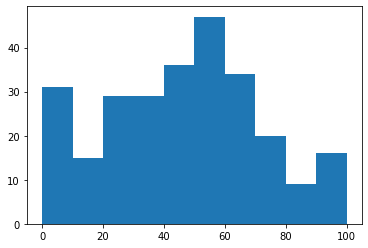

In [13]:
plt.hist(base['average_score'])

In [14]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_score = np.var(base["average_score"],ddof = 0)
print(f"The population variance is {var_score}")

sd_numpy = np.std(base["average_score"],ddof = 0)
print(f"The population standard deviation is {sd_numpy}")

The population variance is 681.1696110577199
The population standard deviation is 26.09922625400454


In [16]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mediana_score-sd_numpy,3)} and {round(mediana_score+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mediana_score-2*sd_numpy,3)} and {round(mediana_score+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mediana_score-3*sd_numpy,3)} and {round(mediana_score+3*sd_numpy,3)}")

Roughly 68% of the data is between 18.901 and 71.099
Roughly 95% of the data is between -7.198 and 97.198
Roughly 99.7% of the data is between -33.298 and 123.298


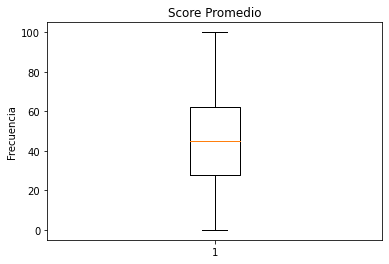

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Score Promedio')
ax1.set_ylabel('Frecuencia')
ax1.boxplot(base['average_score'])
plt.show()

The lower quartile of scores is: 28.0
The upper quartile of scores is: 62.0
The interquartile range of scores is: 34.0
The median of scores is: 45.0 
The mode of scores is: ModeResult(mode=array([0.]), count=array([28])) 
The media of scores is: 45.244360902255636 
Values above 113.0 could be outliers.


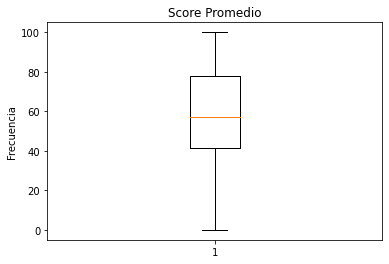

In [36]:
scores = base['average_score']
quartiles = scores.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of scores is: {lowerq}")
print(f"The upper quartile of scores is: {upperq}")
print(f"The interquartile range of scores is: {iqr}")
print(f"The median of scores is: {quartiles[0.5]} ")
print(f"The mode of scores is: {moda_score} ")
print(f"The media of scores is: {media_score} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
fig1, ax1 = plt.subplots()
ax1.set_title('Score Promedio')
ax1.set_ylabel('Frecuencia')
ax1.boxplot(base_proy['average_score'])
plt.show()

In [34]:
scores = base_proy['average_score']
quartiles = scores.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of scores is: {lowerq}")
print(f"The upper quartile of scores is: {upperq}")
print(f"The interquartile range of scores is: {iqr}")
print(f"The median of scores is: {quartiles[0.5]} ")
print(f"The mode of scores is: {moda_score} ")
print(f"The media of scores is: {media_score} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of scores is: 41.5
The upper quartile of scores is: 78.0
The interquartile range of scores is: 36.5
The median of scores is: 57.0 
The mode of scores is: ModeResult(mode=array([0.]), count=array([28])) 
The media of scores is: 45.244360902255636 
Values above 132.75 could be outliers.


The lower quartile of scores is: 22.0
The upper quartile of scores is: 55.0
The interquartile range of scores is: 33.0
The median of scores is: 43.0 
The mode of scores is: ModeResult(mode=array([0.]), count=array([28])) 
The media of scores is: 45.244360902255636 
Values above 104.5 could be outliers.


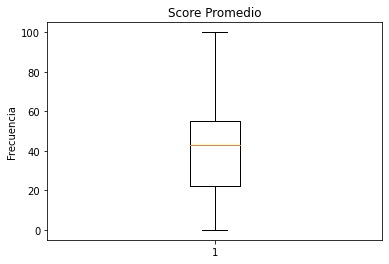

In [37]:
scores = base_actividad['average_score']
quartiles = scores.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of scores is: {lowerq}")
print(f"The upper quartile of scores is: {upperq}")
print(f"The interquartile range of scores is: {iqr}")
print(f"The median of scores is: {quartiles[0.5]} ")
print(f"The mode of scores is: {moda_score} ")
print(f"The media of scores is: {media_score} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
fig1, ax1 = plt.subplots()
ax1.set_title('Score Promedio')
ax1.set_ylabel('Frecuencia')
ax1.boxplot(base_actividad['average_score'])
plt.show()